In [ ]:
# philip walsh
# philipwalsj.ds@gmail.com
# 2019-12-21
# Digit Recognizer from https://www.kaggle.com/c/digit-recognizer/data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv("excluded/train-min.csv")

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
label_df=train_data[['label']]

In [5]:
train_data.drop('label', axis=1, inplace=True)

In [7]:
label_df['label'].head(4)

0    4
1    0
2    9
3    9
Name: label, dtype: int64

In [8]:
# Get rid of $ and , in the SAL-RATE, then convert it to a float
def char_to_ascii(any_char):
    return ord(str(any_char))

ascii_df = label_df['label'].apply(char_to_ascii)

In [9]:
ascii_df.head(4)

0    52
1    48
2    57
3    57
Name: label, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train_data, ascii_df, test_size=0.33, random_state=9261774)

In [19]:
X_train.shape,y_train.shape

((6700, 784), (6700,))

In [20]:
X_test.shape, y_test.shape

((3300, 784), (3300,))

In [21]:
### Fit a linear regression model
model_lr = LinearRegression(normalize=False)
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
## score the model
train_score_lm=model_lr.score(X_train, y_train)
print('lm training score     : ', train_score_lm)

lm training score     :  0.6529985887962104


In [32]:
# run the training data through the predict to get the residuals
predicted = pd.DataFrame(model_lr.predict(X_train))
predicted.columns=['digit_guess']
predicted['digit_guess'] = predicted['digit_guess'].astype(int)
#df.a = df.a.astype(float)
expected = y_train

In [40]:
predicted.head(10)

,digit_guess
0,54
1,55
2,54
3,51
4,48
5,54
6,50
7,52
8,49
9,49


In [41]:
expected.head(10)

3098    57
4829    55
8922    54
4460    53
9014    48
2554    54
6486    49
1992    55
3206    49
4430    50
Name: label, dtype: int64

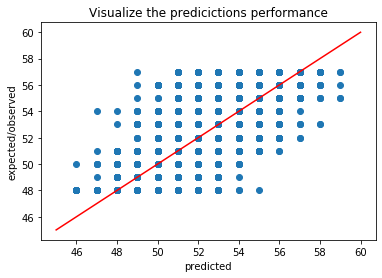

In [39]:
# plot the predicted vs the expected.  
# how well did the model perform
plt.plot([45,60],[45,60], color='red')
plt.title('Visualize the predicictions performance')
plt.xlabel('predicted')
plt.ylabel('expected/observed')
plt.scatter(predicted, expected)